# MODEL FOR PREDICTORS OF LIVER FAILURE

##### This data set was imported from Kaggle URL: https://www.kaggle.com/datasets/rahul121/acute-liver-failure
##### The aim of this model is to use this data set to find feature data most correlated with Acute Liver Failure(ALF). Modeling this will allow us not only to have a better understanding of risks related to ALF, but will also help predict a patients predisposition to ALF when key indicators are considered. 

## 1. DATA WRANGLING

In [1]:
# load relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the csv file to a data frame
df = pd.read_csv('ALF_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

In [4]:
df.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [5]:
# get summary statistics for our data
df.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
count,8785.000000,8591.000000,8594.000000,8495.000000,8495.000000,8471.000000,8481.000000,8409.000000,8768.000000,8767.000000,...,8222.000000,8785.000000,8705.000000,8785.000000,8783.000000,8785.000000,8763.00000,8779.000000,8750.000000,6000.000000
mean,49.349915,79.100198,167.028124,28.296022,0.315951,96.845178,125.832213,71.516827,51.822536,152.587544,...,0.063610,0.304041,0.402412,0.233238,0.111351,0.311781,0.06653,0.020503,0.029029,0.077333
std,18.831309,19.406975,10.103450,6.184846,0.464921,15.101170,21.046860,12.672351,15.789131,42.976096,...,0.244071,0.460026,0.490412,0.422917,0.314585,0.463247,0.24922,0.141723,0.167896,0.267142
min,20.000000,25.600000,130.400000,12.040000,0.000000,58.500000,72.000000,10.000000,8.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,33.000000,65.400000,159.700000,24.080000,0.000000,86.200000,111.000000,64.000000,41.000000,123.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,47.000000,76.800000,166.600000,27.360000,0.000000,96.300000,122.000000,72.000000,49.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,65.000000,89.550000,174.200000,31.380000,1.000000,106.100000,136.000000,79.000000,60.000000,177.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,85.000000,193.300000,200.100000,66.440000,1.000000,173.400000,233.000000,132.000000,160.000000,684.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
#look at the objects within our data frame
df.select_dtypes(include=[object])

,Gender,Region,Source of Care
0,M,east,Governament Hospital
1,M,south,Never Counsulted
2,M,east,Never Counsulted
3,M,east,Private Hospital
4,M,north,clinic
...,...,...,...
8780,F,east,Private Hospital
8781,F,north,Private Hospital
8782,F,south,Private Hospital
8783,F,east,clinic


In [7]:
print(df['Gender'].value_counts())
print(df['Region'].value_counts())
print(df['Source of Care'].value_counts())

M    4630
F    4155
Name: Gender, dtype: int64
east     4324
south    2584
north    1597
west      280
Name: Region, dtype: int64
Private Hospital        5108
clinic                  1863
Never Counsulted        1345
Governament Hospital     466
                           3
Name: Source of Care, dtype: int64


In [8]:
#count null values
df.isna().sum()

Age                          0
Gender                       0
Region                       0
Weight                     194
Height                     191
Body Mass Index            290
Obesity                    290
Waist                      314
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Bad Cholesterol             18
Total Cholesterol           16
Dyslipidemia                 0
PVD                          0
Physical Activity           10
Education                   20
Unmarried                  452
Income                    1161
Source of Care               0
PoorVision                 563
Alcohol Consumption          0
HyperTension                80
Family  HyperTension         0
Diabetes                     2
Family Diabetes              0
Hepatitis                   22
Family Hepatitis             6
Chronic Fatigue             35
ALF                       2785
dtype: int64

In [9]:
#printing head of missing value columns
print(df[['Weight','Height','Body Mass Index','Obesity','Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol','Bad Cholesterol','Total Cholesterol','Physical Activity','Education','Unmarried','Income', 'PoorVision','HyperTension', 'Diabetes','Hepatitis','Chronic Fatigue']].head())

   Weight  Height  Body Mass Index  Obesity  Maximum Blood Pressure  \
0    56.0   162.1            21.31      0.0                   135.0   
1    60.2   162.2            22.88      0.0                    96.0   
2    83.9   162.5            31.77      1.0                   115.0   
3    69.4   160.5            26.94      0.0                   110.0   
4    73.1   159.2            28.84      0.0                   132.0   

   Minimum Blood Pressure  Good Cholesterol  Bad Cholesterol  \
0                    71.0              48.0            249.0   
1                    52.0              31.0            135.0   
2                    57.0              44.0            211.0   
3                    57.0              74.0            156.0   
4                    73.0              67.0            154.0   

   Total Cholesterol  Physical Activity  Education  Unmarried  Income  \
0              297.0                3.0        0.0        0.0     1.0   
1              166.0                3.0   

In [10]:
# fill in continious data missing values
df['Weight'].fillna(df['Weight'].mean(), inplace = True)
df['Height'].fillna(df['Height'].mean(), inplace = True)
df['Body Mass Index'].fillna(df['Body Mass Index'].mean(), inplace = True)
df['Obesity'].fillna(df['Obesity'].mean(), inplace = True)
df['Waist'].fillna(df['Waist'].mean(), inplace = True)
df['Maximum Blood Pressure'].fillna(df['Maximum Blood Pressure'].mean(), inplace = True)
df['Minimum Blood Pressure'].fillna(df['Minimum Blood Pressure'].mean(), inplace = True)
df['Good Cholesterol'].fillna(df['Good Cholesterol'].mean(), inplace = True)
df['Bad Cholesterol'].fillna(df['Bad Cholesterol'].mean(), inplace = True)
df['Total Cholesterol'].fillna(df['Total Cholesterol'].mean(), inplace = True)

In [11]:
# drop rows with no ALF classification or missing discrete values
df.dropna(how='any',inplace=True)
print(df.isnull().sum())

Age                       0
Gender                    0
Region                    0
Weight                    0
Height                    0
Body Mass Index           0
Obesity                   0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Total Cholesterol         0
Dyslipidemia              0
PVD                       0
Physical Activity         0
Education                 0
Unmarried                 0
Income                    0
Source of Care            0
PoorVision                0
Alcohol Consumption       0
HyperTension              0
Family  HyperTension      0
Diabetes                  0
Family Diabetes           0
Hepatitis                 0
Family Hepatitis          0
Chronic Fatigue           0
ALF                       0
dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap')

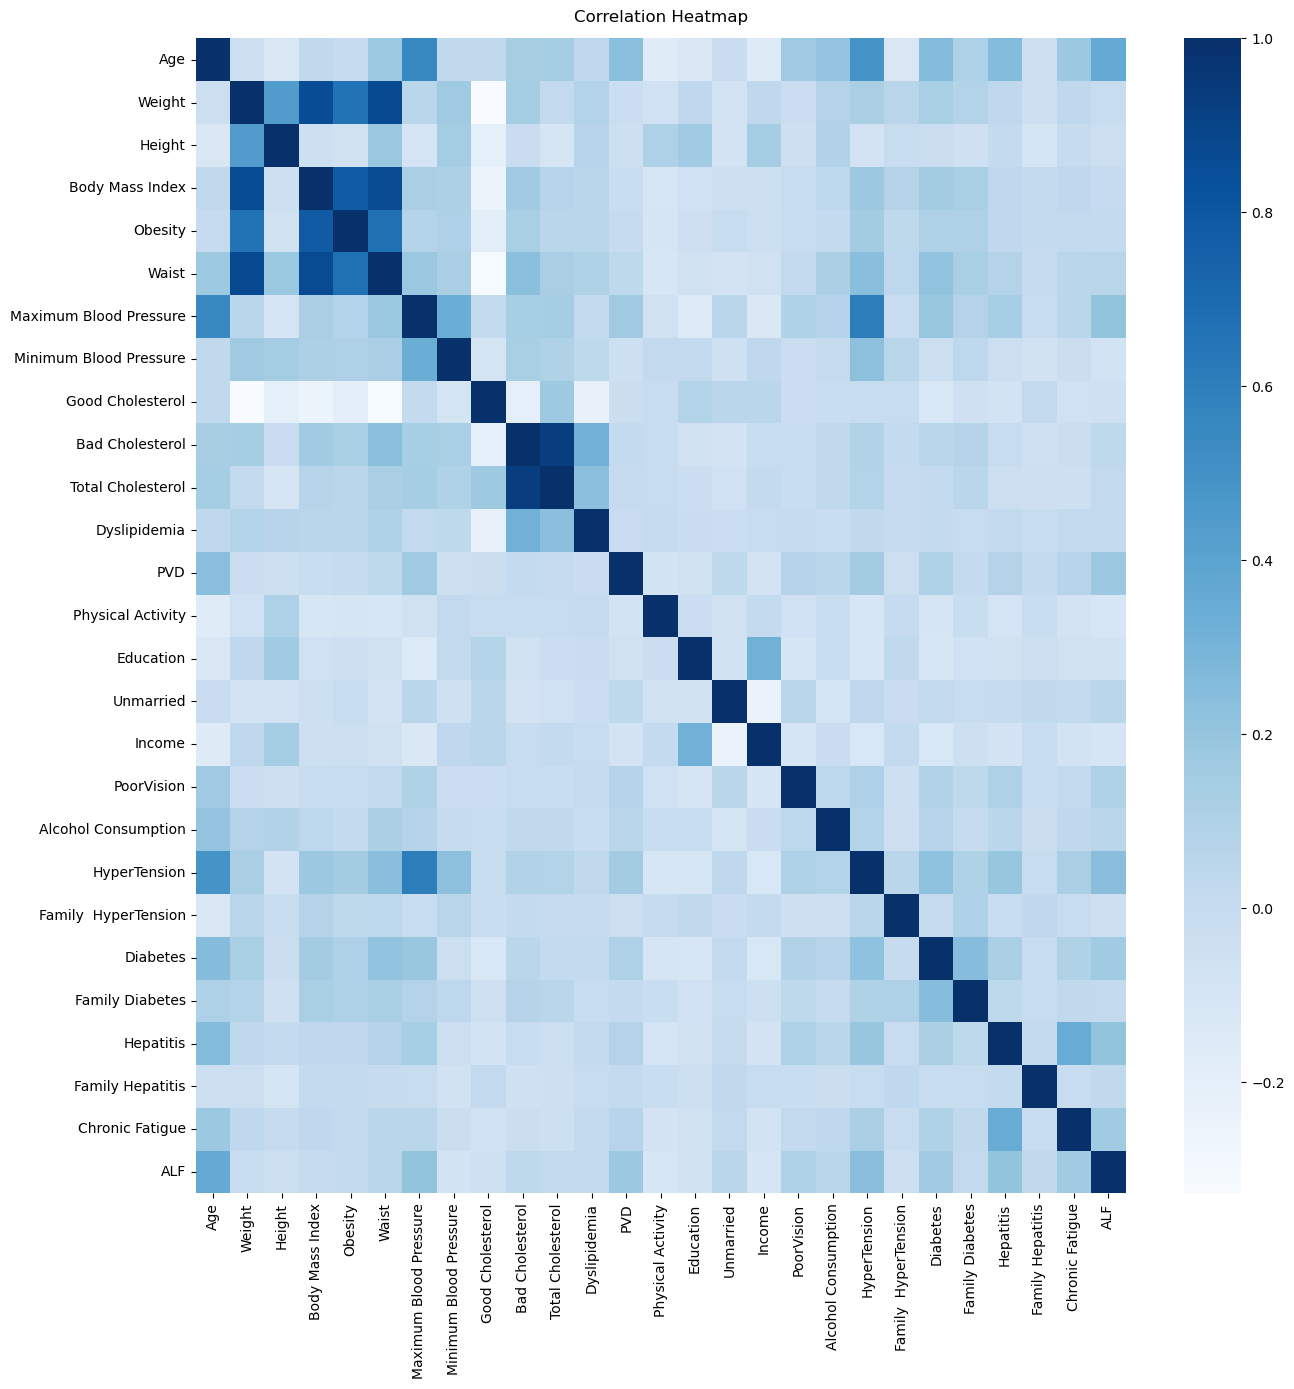

In [12]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=False,cmap ='Blues')
p.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

##### To get a better view of significant features we need to reduce the number of features, starting with removing those with a correlation value greater than .8 as these don't provide new insights beyond common knowledge

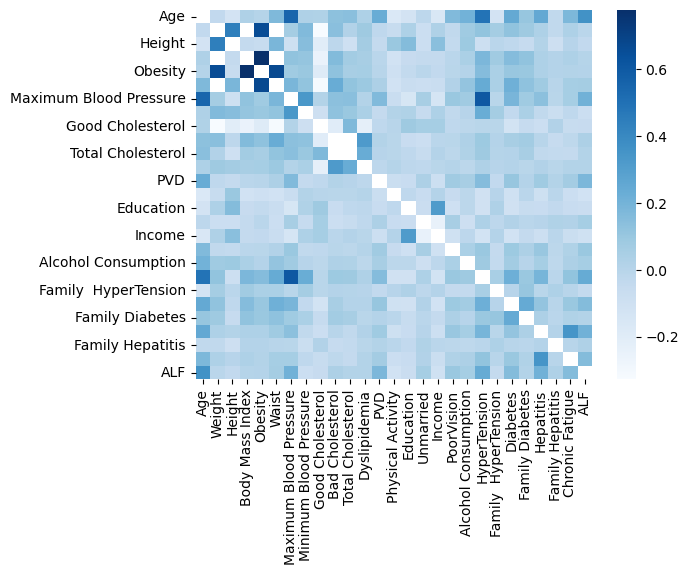

In [13]:
#reducing heatmap to only show correlation above 0.8
corr = df.corr()
maxcor = corr[corr< 0.8]
sns.heatmap(maxcor, cmap="Blues")
plt.show()

##### Great, this has significantly reduced the feature we are looking at. Now let's plot histograms of our  selected features

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Obesity'}>,
        <AxesSubplot:title={'center':'Maximum Blood Pressure'}>],
       [<AxesSubplot:title={'center':'Good Cholesterol'}>,
        <AxesSubplot:title={'center':'Total Cholesterol'}>,
        <AxesSubplot:title={'center':'PVD'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Alcohol Consumption'}>,
        <AxesSubplot:title={'center':'Family  HyperTension'}>,
        <AxesSubplot:title={'center':'Family Diabetes'}>],
       [<AxesSubplot:title={'center':'Family Hepatitis'}>,
        <AxesSubplot:title={'center':'ALF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

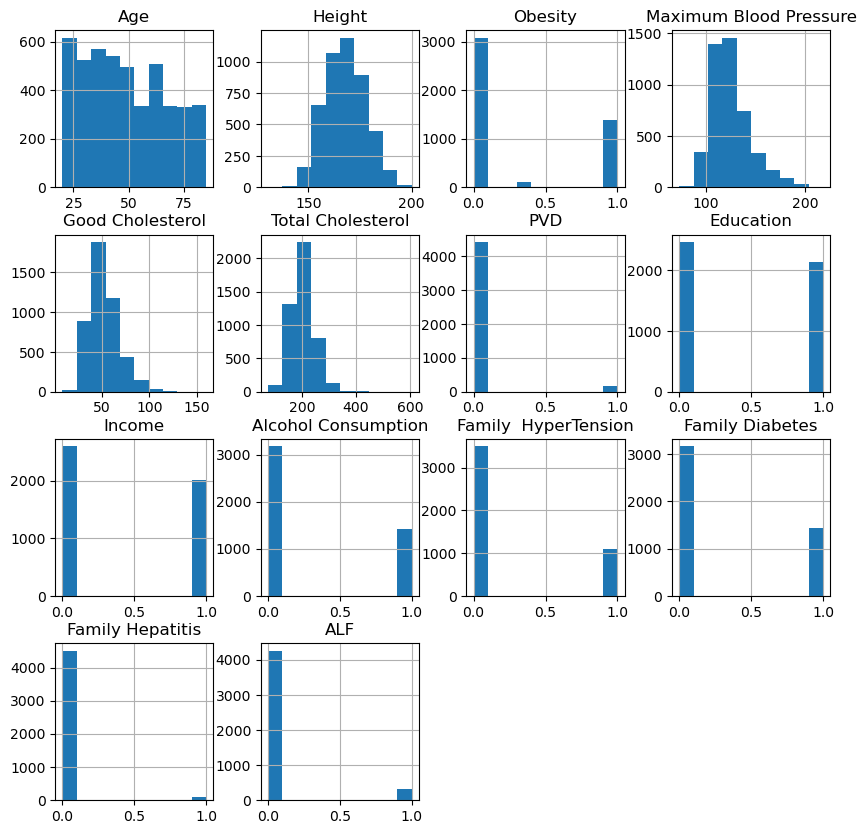

In [14]:
df.hist(figsize=(10,10),column=["Age","Height","Obesity","Maximum Blood Pressure", "Good Cholesterol", "Total Cholesterol", "PVD", "Education", "Income","Alcohol Consumption", "Family  HyperTension", "Family Diabetes", "Family Hepatitis","ALF"])

In [15]:
#first lets group our df by the target category to calculate t-scores 
No_ALF = df[df['ALF']==0]
ALF = df[df['ALF']==1]

The P-Value of the T-Test for Age and ALF is: 8.372022770121974e-141


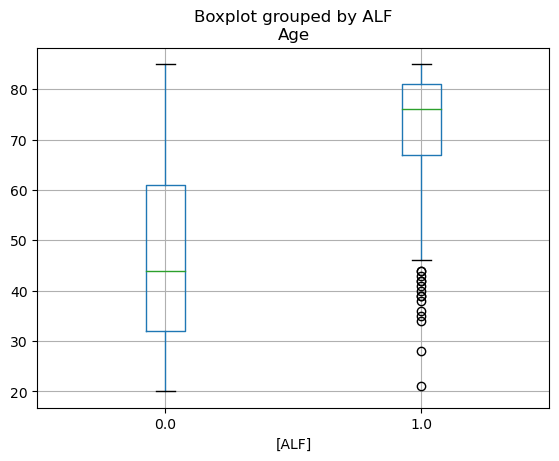

In [16]:
# Age vs our target feature Acute Liver Failure where 1 is the presence of acute liver failure
df.boxplot(column=['Age'],by = ['ALF'])
pd.DataFrame(df.groupby( ['ALF'])['Age'].describe().loc[:,['mean','std']])
Age_TT = stats.ttest_ind(No_ALF['Age'], ALF['Age'])
print('The P-Value of the T-Test for Age and ALF is:', Age_TT[1])

The P-Value of the T-Test for Height and ALF is: 0.012903239138577634


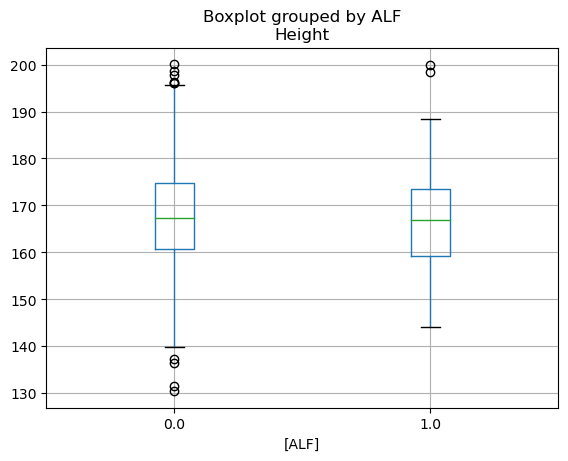

In [17]:
# Height vs our target feature Acute Liver Failure where 1 is the presence of acute liver failure
df.boxplot(column=['Height'],by = ['ALF'])
pd.DataFrame(df.groupby( ['ALF'])['Height'].describe().loc[:,['mean','std']])
Height_TT = stats.ttest_ind(No_ALF['Height'], ALF['Height'])
print('The P-Value of the T-Test for Height and ALF is:', Height_TT[1])

The P-Value of the T-Test for Maximum Blood Pressure and ALF is: 3.278601387442384e-47


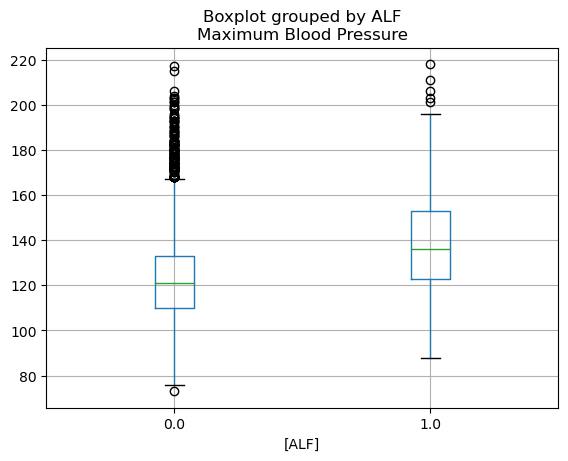

In [18]:
# Maximum Blood Pressure vs our target feature Acute Liver Failure where 1 is the presence of acute liver failure
df.boxplot(column=['Maximum Blood Pressure'],by = ['ALF'])
pd.DataFrame(df.groupby( ['ALF'])['Maximum Blood Pressure'].describe().loc[:,['mean','std']])
BP_TT = stats.ttest_ind(No_ALF['Maximum Blood Pressure'], ALF['Maximum Blood Pressure'])
print('The P-Value of the T-Test for Maximum Blood Pressure and ALF is:', BP_TT[1])

The P-Value of the T-Test for Good Cholesterol and ALF is: 0.0003338407771324119


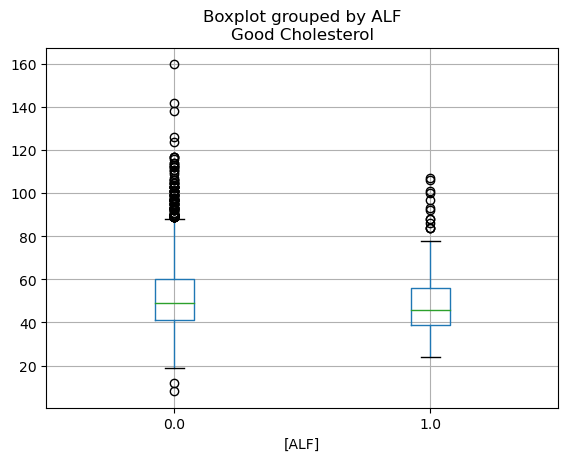

In [19]:
# Good Cholesterol vs our target feature Acute Liver Failure where 1 is the presence of acute liver failure
df.boxplot(column=['Good Cholesterol'],by = ['ALF'])
pd.DataFrame(df.groupby( ['ALF'])['Good Cholesterol'].describe().loc[:,['mean','std']])
GC_TT = stats.ttest_ind(No_ALF['Good Cholesterol'], ALF['Good Cholesterol'])
print('The P-Value of the T-Test for Good Cholesterol and ALF is:', GC_TT[1])

The P-Value of the T-Test for Total Cholesterol and ALF is: 0.2629995871577423


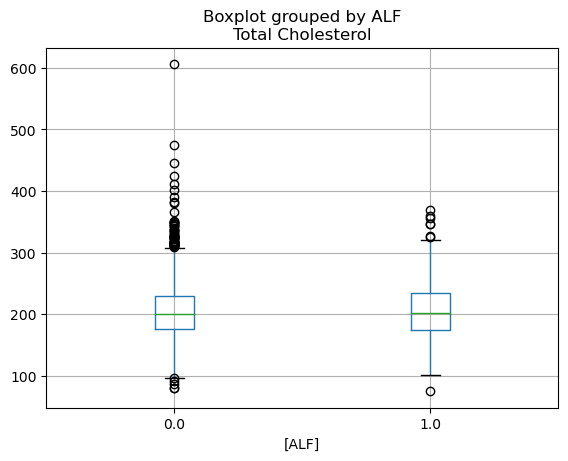

In [20]:
# Total Cholesterol vs our target feature Acute Liver Failure where 1 is the presence of acute liver failure
df.boxplot(column=['Total Cholesterol'],by = ['ALF'])
pd.DataFrame(df.groupby( ['ALF'])['Total Cholesterol'].describe().loc[:,['mean','std']])
Tot_TT = stats.ttest_ind(No_ALF['Total Cholesterol'], ALF['Total Cholesterol'])
print('The P-Value of the T-Test for Total Cholesterol and ALF is:', Tot_TT[1])

The P-Value of the Chi Square Test for Obesity and ALF is: 0.5072973125105736


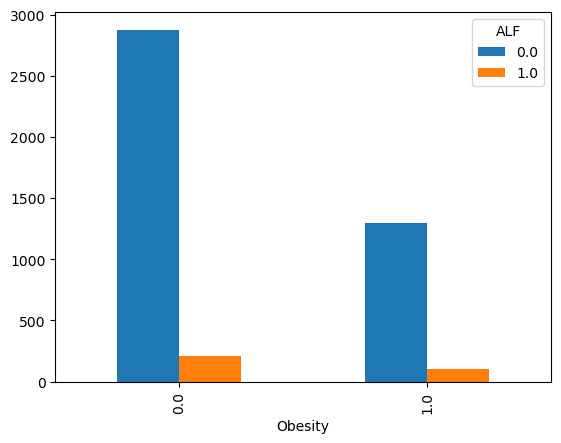

In [21]:
#From our histogram above we can see that obesity has a value that is unqiue and not categorical. Lets remove that outlier. 
Ovals= [0,1]
df = df[df.Obesity.isin(Ovals) == True]
# plotting Obesityand ALF presense as a boxplot 
pd.crosstab(index=df['Obesity'],columns=df['ALF']).plot(kind="bar")
Obesity_ChiSq = chi2_contingency(pd.crosstab(index=df['Obesity'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for Obesity and ALF is:', Obesity_ChiSq[1])

The P-Value of the Chi Square Test for PVD and ALF is: 7.461400988767926e-33


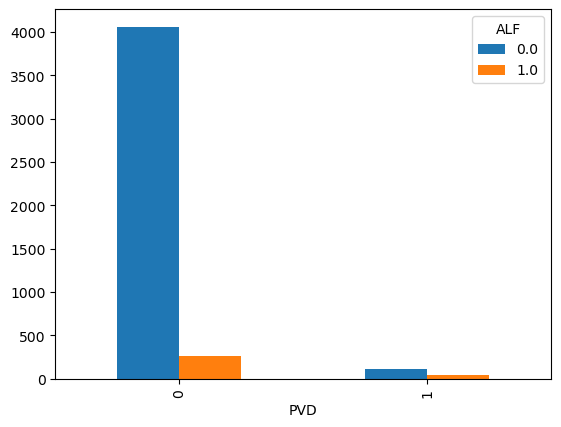

In [22]:
# plotting PVD (Peripheral Artery Disease) and ALF presense as a boxplot 
pd.crosstab(index=df['PVD'],columns=df['ALF']).plot(kind="bar")
PVD_ChiSq = chi2_contingency(pd.crosstab(index=df['PVD'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for PVD and ALF is:', PVD_ChiSq[1])

The P-Value of the Chi Square Test for Education and vs ALF is: 9.395655690569739e-06


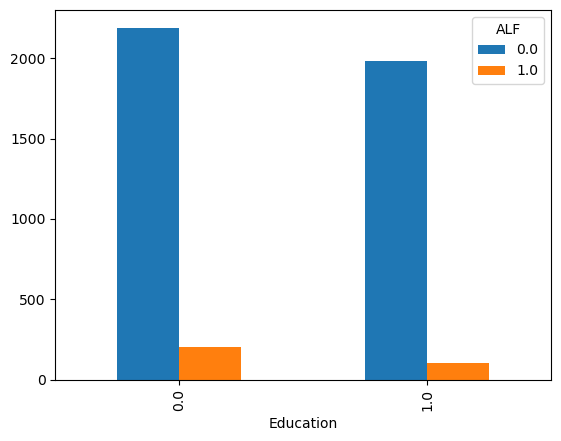

In [23]:
# plotting Education and ALF presense as a boxplot 
pd.crosstab(index=df['Education'],columns=df['ALF']).plot(kind="bar")
Ed_ChiSq = chi2_contingency(pd.crosstab(index=df['Education'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for Education and vs ALF is:', Ed_ChiSq[1])

The P-Value of the Chi Square Test for Income and ALF is: 1.7183988316902574e-10


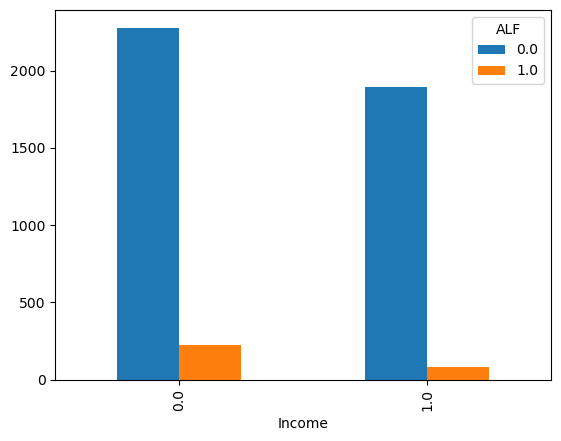

In [24]:
# Income and ALF presense as a boxplot 
pd.crosstab(index=df['Income'],columns=df['ALF']).plot(kind="bar")
Income_ChiSq = chi2_contingency(pd.crosstab(index=df['Income'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for Income and ALF is:', Income_ChiSq[1])

The P-Value of the Chi Square Test for Alcohol Consumption and ALF is: 0.00023668130233894146


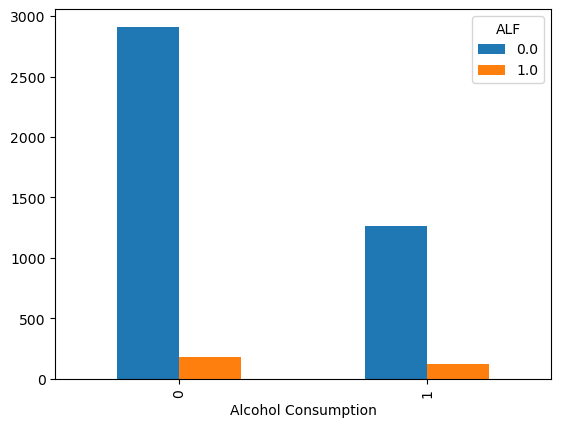

In [25]:
# Alcohol Consumption and ALF presense as a boxplot 
pd.crosstab(index=df['Alcohol Consumption'],columns=df['ALF']).plot(kind="bar")
AC_ChiSq = chi2_contingency(pd.crosstab(index=df['Alcohol Consumption'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for Alcohol Consumption and ALF is:', AC_ChiSq[1])

The P-Value of the Chi Square Test for Family Hypertension and ALF is: 0.0026312021130792795


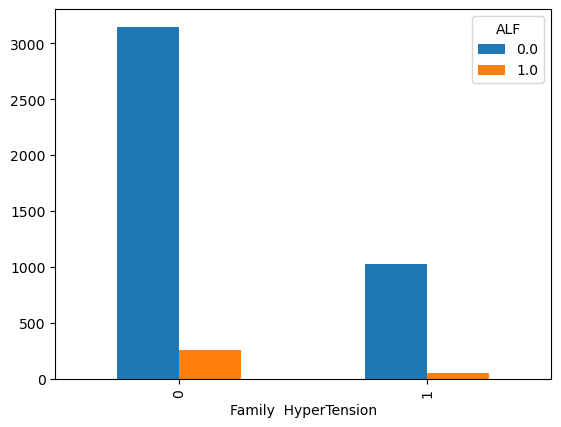

In [26]:
# Family  HyperTension and ALF presense as a boxplot 
pd.crosstab(index=df['Family  HyperTension'],columns=df['ALF']).plot(kind="bar")
FamHT_ChiSq = chi2_contingency(pd.crosstab(index=df['Family  HyperTension'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for Family Hypertension and ALF is:', FamHT_ChiSq[1])

The P-Value of the Chi Square Test for Family Diabetes and ALF is: 0.25585738358889676


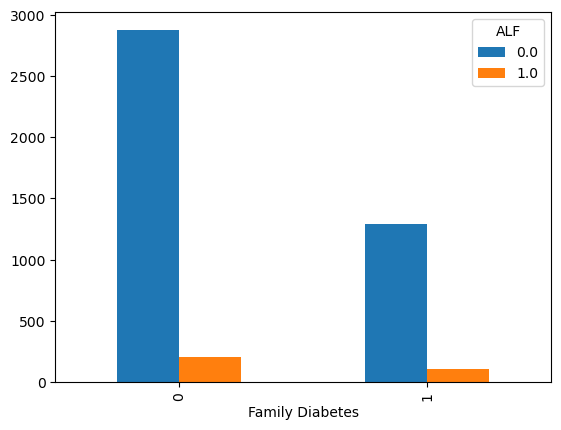

In [27]:
# Family Diabetes and ALF presense as a boxplot 
pd.crosstab(index=df['Family Diabetes'],columns=df['ALF']).plot(kind="bar")
FamD_ChiSq = chi2_contingency(pd.crosstab(index=df['Family Diabetes'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for Family Diabetes and ALF is:', FamD_ChiSq[1])

The P-Value of the Chi Square Test for Family Hepatitis and ALF is: 0.25356794858710174


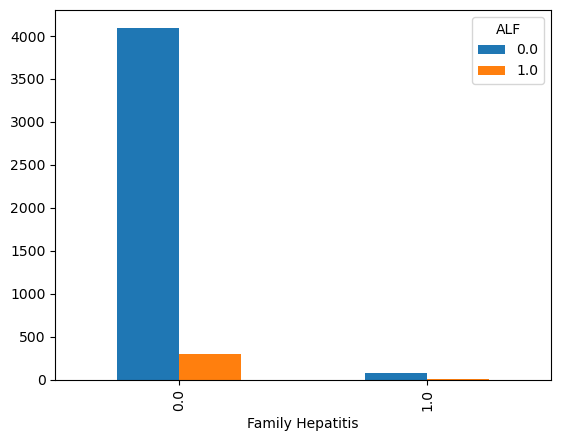

In [28]:
# Family Hepatitis and ALF presense as a boxplot 
pd.crosstab(index=df['Family Hepatitis'],columns=df['ALF']).plot(kind="bar")
FamH_ChiSq = chi2_contingency(pd.crosstab(index=df['Family Hepatitis'],columns=df['ALF']))
print('The P-Value of the Chi Square Test for Family Hepatitis and ALF is:', FamH_ChiSq[1])

In [29]:
#Making a table of chi squared values for easy readability
Cat_CHIs = [['Obesity', Obesity_ChiSq[1]],['PVD',PVD_ChiSq[1]],['Education',Ed_ChiSq[1]],['Income',Income_ChiSq[1]],
            ['Alcohol Consumption',AC_ChiSq[1]],['Family  HyperTension',FamHT_ChiSq[1]],['Family Diabetes', FamD_ChiSq[1]],   
            ['Family Hepatitis',FamH_ChiSq[1]]]
from tabulate import tabulate
print(tabulate(Cat_CHIs, headers=['Categorical Feature','Chi-Sq P-Value']))


Categorical Feature      Chi-Sq P-Value
---------------------  ----------------
Obesity                     0.507297
PVD                         7.4614e-33
Education                   9.39566e-06
Income                      1.7184e-10
Alcohol Consumption         0.000236681
Family  HyperTension        0.0026312
Family Diabetes             0.255857
Family Hepatitis            0.253568


In [30]:
#Making a table of t-test values for easy readability
TTest_scores = [['Age',Age_TT[1]],['Height',Height_TT[1]],['Maximum Blood Pressure',BP_TT[1]],['Good Cholesterol',GC_TT[1]],
                ['Total Cholesterol',Tot_TT[1]]]
print(tabulate(TTest_scores, headers=['Distinct Feature','T-Test P-Value']))

Distinct Feature          T-Test P-Value
----------------------  ----------------
Age                         8.37202e-141
Height                      0.0129032
Maximum Blood Pressure      3.2786e-47
Good Cholesterol            0.000333841
Total Cholesterol           0.263


#### From our test statistics it has been determined that our features of most significance are PVD, Education, Income, Age, and Maximum blood pressure. We can also add Alcohol consumption, Family Hypertension, and Good Cholesterol to these features, as their p value is still signifcant just not as significant as the features first mentioned.

## Feature Engineering
##### Creating dummy variarbles and pre-processing my data into a test-train split. 

In [31]:
#creating dummies for PVD (Peripheral Artery Disease)
pvd_dummies = pd.get_dummies(df['PVD'])
pvd_dummies.head()

,0,1
0,1,0
2,1,0
3,1,0
5,1,0
6,1,0


In [32]:
#creating dummies for Income
income_dummies = pd.get_dummies(df['Income'])
income_dummies.head()

,0.0,1.0
0,0,1
2,1,0
3,1,0
5,1,0
6,1,0


In [33]:
#creating dummies for Education
edu_dummies = pd.get_dummies(df['Education'])
edu_dummies.head()

,0.0,1.0
0,1,0
2,1,0
3,0,1
5,0,1
6,0,1


In [34]:
#specify X and y 
X = df[['PVD', 'Education', 'Income', 'Age', 'Maximum Blood Pressure']]
y = df['ALF']

In [35]:
# scale and fit data
scaler = StandardScaler()
scaler.fit_transform (X)
scaler.transform(X)

array([[-0.19547925, -0.93412963,  1.12586728,  0.91587179,  0.52020897],
       [-0.19547925, -0.93412963, -0.88820416,  0.97037451, -0.47909472],
       [-0.19547925,  1.07051524, -0.88820416,  0.3163419 , -0.72892064],
       ...,
       [-0.19547925,  1.07051524, -0.88820416, -0.99172333,  0.07052231],
       [-0.19547925, -0.93412963, -0.88820416,  1.46089897,  0.22041787],
       [-0.19547925,  1.07051524,  1.12586728, -0.71920974, -1.4783984 ]])

In [36]:
#perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Machine Learning
##### Comparing different prediction models on my dataset. Since my target feature is categorical , I will only be using classification models as opposed to regression.

### Decision Tree
###### A decision tree will allow me to create a simple tree to visulaize numeric/categorical data. Its a well performin and is able to validated to check its reliability. 

In [37]:
from sklearn import tree

#performing decision tree on training set
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(X_train, y_train)

y_predict_dt = clf_train.predict(X_test)

dt_accuracy = clf_train.score(X_test, y_test)
print(dt_accuracy)

0.8918918918918919


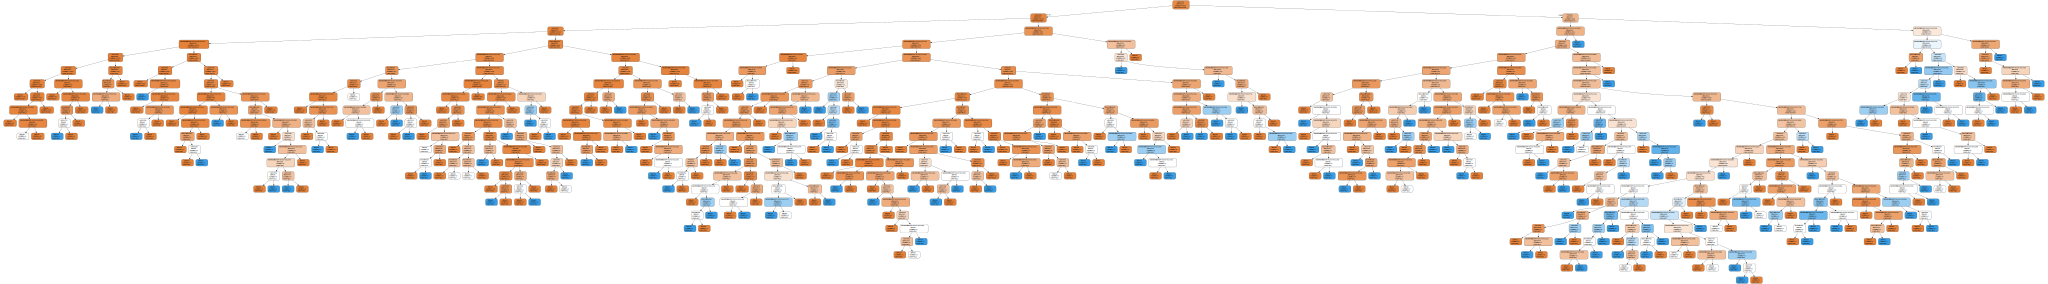

In [38]:
#visualizing decision tree on train set with graphiz
import graphviz 
dot_data_train = tree.export_graphviz(clf_train, out_file=None,
                                    feature_names=X.columns,
                                    filled=True, rounded=True,
                                    special_characters=True)  
train_graph = graphviz.Source(dot_data_train) 
train_graph

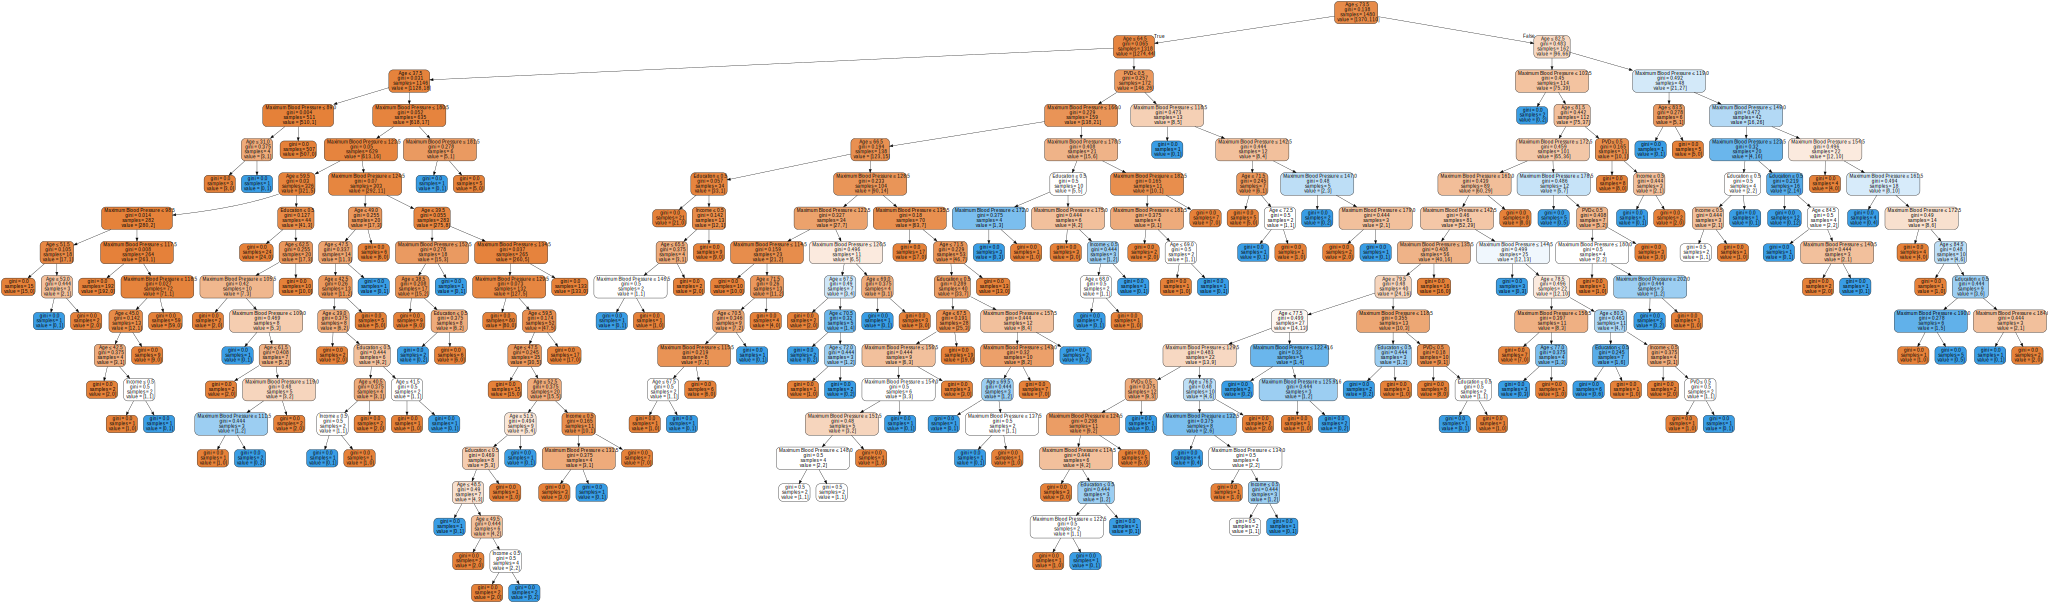

In [39]:
#performing decision tree visualization test set
clf_test = clf.fit(X_test, y_test)
clf_test.predict
dot_data_test = tree.export_graphviz(clf_test, out_file=None,
                                    feature_names=X.columns,
                                    filled=True, rounded=True,
                                    special_characters=True,)  
test_graph = graphviz.Source(dot_data_test) 
test_graph

### Ensemble - Gradient Boosting

###### Ensemble methods combine predictions of estimators. I can use an averaging ensemble method that uses the average of independent estimates, or a boosting method that reduces bias by using the combination of several built estimators.  For my modelling, I am going to use a boosting method as my dataset is small and I want to minimize avoid that. Gradient boosting is known for it's flexibility and can be used on classification. 

In [40]:
# running gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

y_predict_gb = GB_clf.predict(X_test)

gb_accuracy = GB_clf.score(X_test, y_test)
gb_accuracy

0.9263513513513514

### Nearest Neighbors - K Nearest Neighbors
###### Nearest neighbors classification calculates the distance between data points in order to classify them. Setting the value of "k" when using k neighbors affects the model by imposing less noise/less distinct boundaries (high K value) or more noise/more distinct values. So setting the K value affects predictiveness of model, and it is important to keep in mind if specificity or sensitivity is valued more. 

##### For my model, I want acute liver failure to have a higher sensitivity to reduce false negative rates. This means I will likely have a higher K Value. 

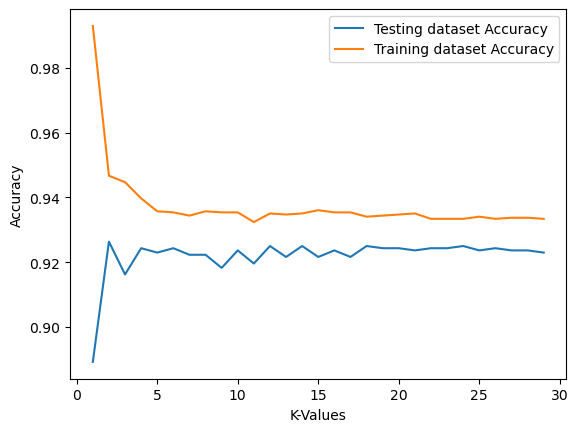

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
# Loop over K values to determine best K value
krange = np.arange(1,30)
train_accuracy = np.empty(len(krange))
test_accuracy = np.empty(len(krange))

for i, k in enumerate(krange):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
#plot 
plt.plot(krange, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(krange, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.show()

In [42]:
# use model to predict on test set
y_predict_knn=knn.predict(X_test)
print(y_predict_knn)

# print accuracy of model
knn_accuracy = knn.score(X_test, y_test)
print(knn_accuracy)

[0. 0. 0. ... 0. 0. 0.]
0.922972972972973


### Gaussian
##### Gaussian is a naive bayes distribution that fits a bell curve seen in many distributions. This supervised learning model, being that it fits a normal distribution, should work well on our dataset since many of our non categorical features do follow a normal distribution. 

In [43]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus.fit(X_train, y_train)

y_predict_gaus =  gaus.predict(X_test)
gaus.predict(X_test)

gaussian_accuracy = gaus.score(X_test, y_test)
gaussian_accuracy

0.9033783783783784

## Confusion Matrix
#### To compare models I will use a confusion matrix to determine which one of the ones ran, gives me the best performance

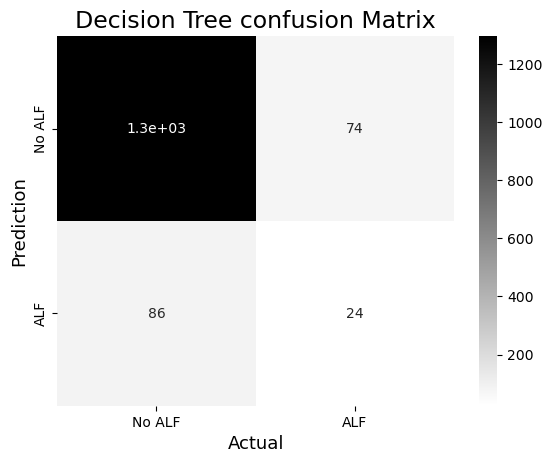

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Confusion matrix for decision tree
cnf_matrix_dt = confusion_matrix(y_test, y_predict_dt)
dt_cnf_hm = sns.heatmap(cnf_matrix_dt, annot=True,cmap='binary', xticklabels=['No ALF', 'ALF'],
            yticklabels=['No ALF', 'ALF'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Decision Tree confusion Matrix',fontsize=17)
plt.show()

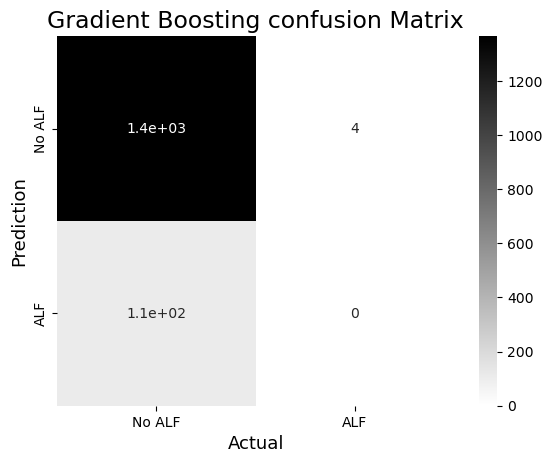

In [45]:
#Confusion matrix for gradient boosting
cnf_matrix_gb = confusion_matrix(y_test, y_predict_knn)
gb_cnf_hm = sns.heatmap(cnf_matrix_gb, annot=True,cmap='binary',xticklabels=['No ALF', 'ALF'],
            yticklabels=['No ALF', 'ALF'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Gradient Boosting confusion Matrix',fontsize=17)
plt.show()

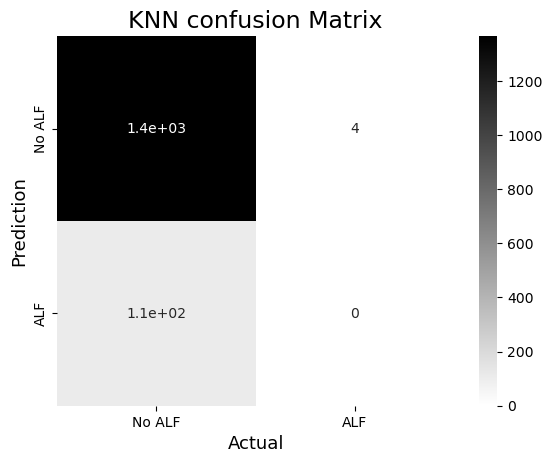

In [46]:
#Confusion matrix for knn
cnf_matrix_knn = confusion_matrix(y_test, y_predict_knn)
knn_cnf_hm = sns.heatmap(cnf_matrix_knn, annot=True,cmap='binary', xticklabels=['No ALF', 'ALF'],
            yticklabels=['No ALF', 'ALF'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('KNN confusion Matrix',fontsize=17)
plt.show()

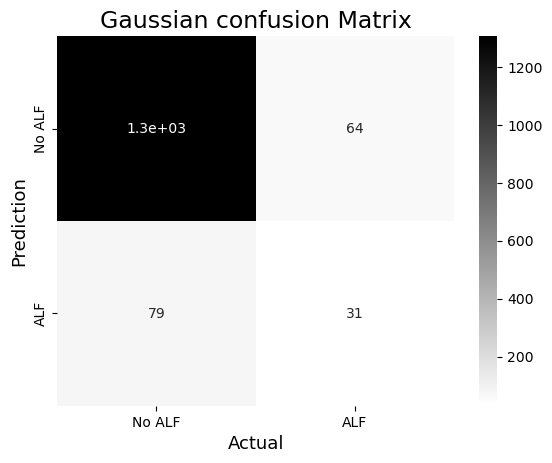

In [47]:
#Confusion matrix for Gaussian naive bayes
cnf_matrix_gaus = confusion_matrix(y_test, y_predict_gaus)
gaus_cnf_hm = sns.heatmap(cnf_matrix_gaus, annot=True, cmap='binary', xticklabels=['No ALF', 'ALF'],
            yticklabels=['No ALF', 'ALF'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Gaussian confusion Matrix',fontsize=17)
plt.show()

In [48]:
# comparing Accuracy scores
model_accuracies = [['Decision Tree', dt_accuracy],['Gradient Boosting', gb_accuracy],
                    ['K Nearest Neighbors', knn_accuracy],['Gaussian', gaussian_accuracy]]
print(tabulate(model_accuracies, headers=['Model','Accuracy scores']))

Model                  Accuracy scores
-------------------  -----------------
Decision Tree                 0.891892
Gradient Boosting             0.926351
K Nearest Neighbors           0.922973
Gaussian                      0.903378


##### Although our Gaussian and Decision Tree models had lower accuracy score, they did a far better job at calling true positives and reducing false negatives. If we want our model to be best at calling true positives, the confusion matrices above show that Gaussian is our best model for that. We can prove this by reviewing the scores below. 

In [49]:
# compare scores of confusion matrices
from sklearn.metrics import classification_report

dt_report = classification_report(y_test, y_predict_dt)
gb_report = classification_report(y_test, y_predict_gb)
knn_report = classification_report(y_test, y_predict_knn)
gaus_report = classification_report(y_test, y_predict_gaus)

print('The Decision Tree classification report is: ')
print(dt_report)
print('The Gradiant Boost classification report is: ')
print(gb_report)
print('The KNN classification report is: ')
print(knn_report)
print('The Gaussian classification report is: ')
print(gaus_report)

The Decision Tree classification report is: 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      1370
         1.0       0.24      0.22      0.23       110

    accuracy                           0.89      1480
   macro avg       0.59      0.58      0.59      1480
weighted avg       0.89      0.89      0.89      1480

The Gradiant Boost classification report is: 
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1370
         1.0       0.55      0.05      0.10       110

    accuracy                           0.93      1480
   macro avg       0.74      0.53      0.53      1480
weighted avg       0.90      0.93      0.90      1480

The KNN classification report is: 
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1370
         1.0       0.00      0.00      0.00       110

    accuracy                           0.92      1480
  